In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

In [302]:
#loading data sets
train_data=pd.read_csv("./data_sets/house_price/train.csv")
test_data=pd.read_csv("./data_sets/house_price/test.csv")

# Exploring data

In [303]:
#viewing features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [304]:
#viewing sample data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [305]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

mu=180921.19589041095 sigma=79415.29188606751


<function matplotlib.pyplot.show(*args, **kw)>

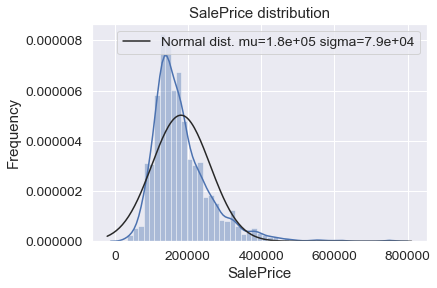

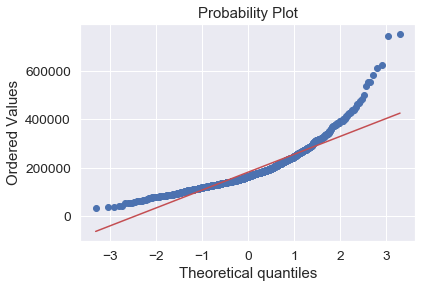

In [306]:
sns.distplot(train_data['SalePrice'], fit=norm)

#getting the fitting parameters from actual to normal
(mu,sigma)=norm.fit(train_data['SalePrice'])
print(f'mu={mu} sigma={sigma}')

#plotting the distribution
plt.legend([f'Normal dist. mu={mu:.2} sigma={sigma:.2}'],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
res=stats.probplot(train_data['SalePrice'], plot=plt)
plt.show

#### On above results
The distribution is right skewed since mean>median

<function matplotlib.pyplot.show(*args, **kw)>

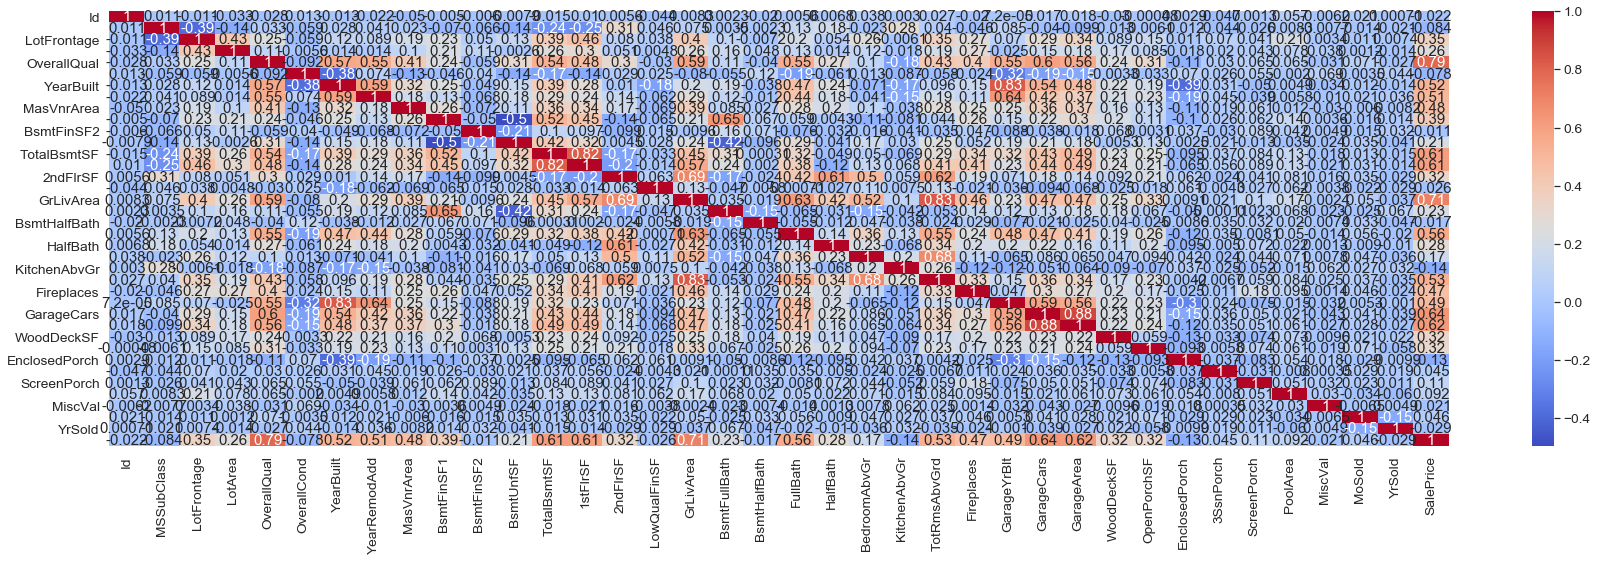

In [307]:
#plotting correleation of columns
plt.figure(figsize=(30,8))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot=True)
plt.show

#### On correlations
1 means a perfect positive correlation, 0 means no correlation, -1 means perfect negative correlation.
Positive correlation means that if one variable increases so does the other one, negative is the opposite scenario.

#### On usage of correlations
We can see the most corelated parameters (high magnitude). We can pick these as our features for the models.

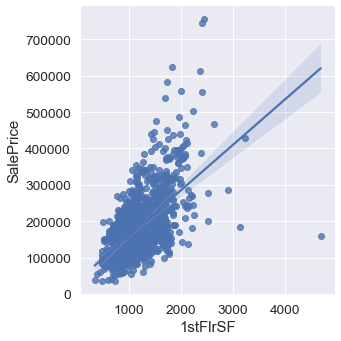

In [308]:
sns.lmplot(x='1stFlrSF',y='SalePrice', data=train_data)

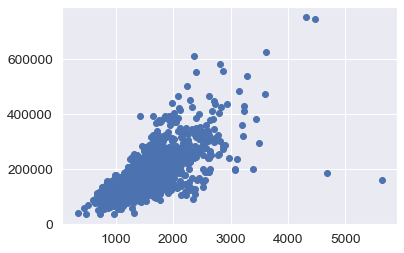

In [309]:
plt.scatter(x='GrLivArea',y='SalePrice',data=train_data)

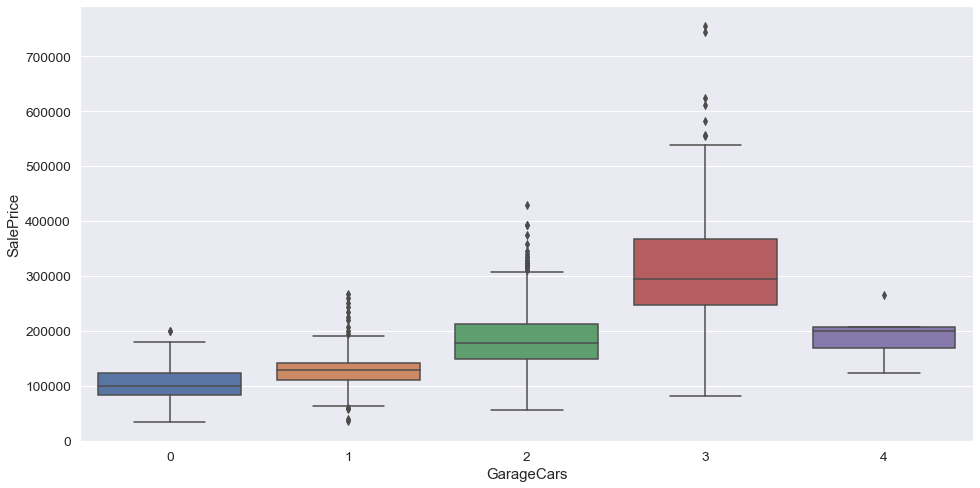

In [310]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train_data)
plt.show()            

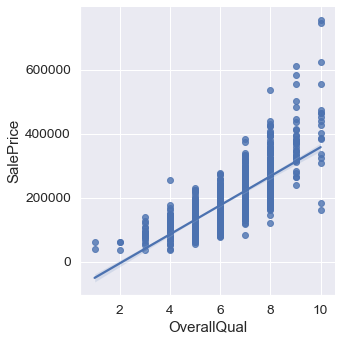

In [311]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train_data)

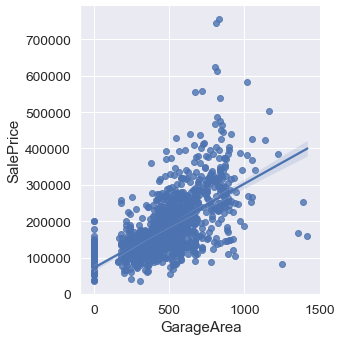

In [312]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train_data)

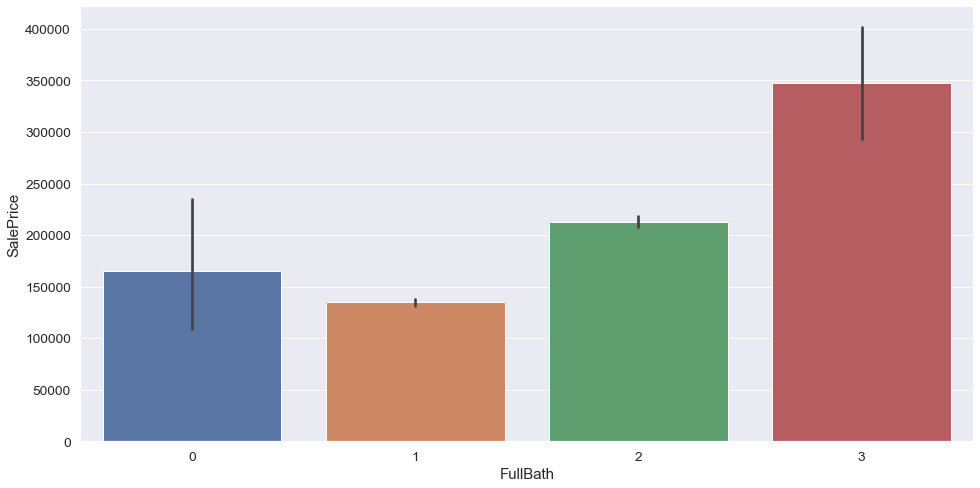

In [313]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y='SalePrice',data=train_data)
plt.show()

# Feature Engineering

In [314]:
#missing data
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [315]:
train_data=train_data.drop((missing_data[missing_data['Total']>81]).index,1)

In [316]:
train_data.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

In [317]:
total=test_data.isnull().sum().sort_values(ascending=False)
percent=(test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


Drop some the columns with most missing data

In [318]:
test_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [319]:
#before we modify the data, here is a sample of we are trying mitigate
unique_sample=test_data['GarageFinish'].unique()
print(unique_sample)
#droping columns with missing counts higher than 81
test_data=test_data.drop((missing_data[missing_data['Total']>81]).index,1)

['Unf' 'Fin' 'RFn' nan]


Handle the columns without significant missing value amount

In [320]:
#Categorical boolean mask (True for whichever columns are of type object(These are columns with mixed datatypes))
categorical_feature_mask=train_data.dtypes==object
#categorical_feature_mask[categorical_feature_mask==True]
#Filter categorical columns using mask and tun it into a list
categorical_cols = train_data.columns[categorical_feature_mask].tolist()

In [321]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train_data[categorical_cols]=train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [322]:
#Categorical boolean mask (True for whichever columns are of type object(These are columns with mixed datatypes))
categorical_feature_mask_test=test_data.dtypes==object
#Filter categorical columns using mask and tun it into a list
categorical_cols_test = test_data.columns[categorical_feature_mask_test].tolist()

In [323]:
labelencoder_test=LabelEncoder()
test_data[categorical_cols_test]=test_data[categorical_cols_test].apply(lambda col: labelencoder_test.fit_transform(col.astype(str)))

In [324]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [325]:
test_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


So now we have categorical data encoded numerically

In [326]:
#here is an example of finished result
print(f'Before: {unique_sample}')
print(f'After: {test_data["GarageFinish"].unique()}')

Before: ['Unf' 'Fin' 'RFn' nan]
After: [2 0 1 3]


So 'nan' becomes an actual value. This results in:

In [327]:
train_data.isnull().sum().sort_values(ascending=False).head(5)

GarageYrBlt    81
MasVnrArea      8
ExterCond       0
RoofStyle       0
RoofMatl        0
dtype: int64

In [328]:
test_data.isnull().sum().sort_values(ascending=False).head(15)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
GarageArea       1
BsmtUnfSF        1
BsmtFinSF1       1
GarageCars       1
BsmtFinSF2       1
LandSlope        0
Neighborhood     0
MSSubClass       0
BsmtFinType1     0
BsmtExposure     0
dtype: int64

In [329]:
#Since GarageYrBlt and MasVnrArea are both numberical values, they were not encoded
#Some testing aside
print("Here it is visible how pandas assigns data type to the column: ")
aside_test_data={'col_A':[1,2,None],'col_B':[1,'Test',None],'col_C':['Test','Test2',None],'col_d':['Test1','Test2','Test3']}
data_pd=pd.DataFrame(aside_test_data)
print(data_pd)
print(data_pd.dtypes)
print("\n Since str data in the set is stored as an object, that's why the above encoding methods work to reduce missing values")

Here it is visible how pandas assigns data type to the column: 
   col_A col_B  col_C  col_d
0    1.0     1   Test  Test1
1    2.0  Test  Test2  Test2
2    NaN  None   None  Test3
col_A    float64
col_B     object
col_C     object
col_d     object
dtype: object

 Since str data in the set is stored as an object, that's why the above encoding methods work to reduce missing values


In [330]:
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())


### Picking features for the model

<function matplotlib.pyplot.show(*args, **kw)>

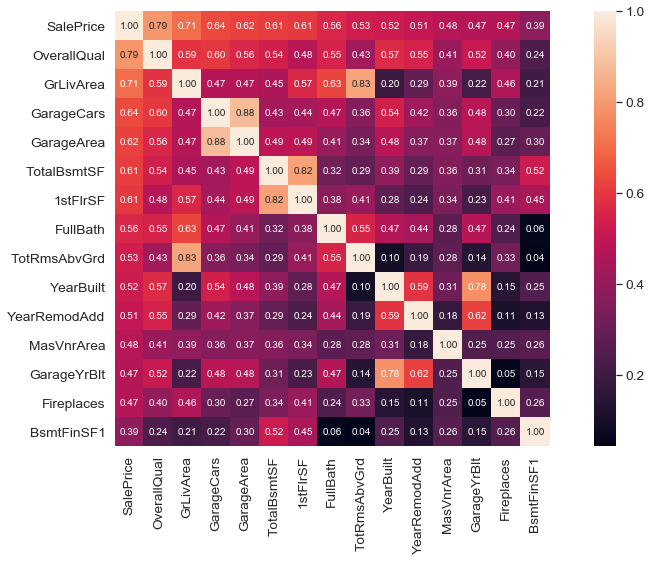

In [331]:
#Sale price correlation matrix
k=15
plt.figure(figsize=(16,8))
#picking top K correlated features by get 15 rows with largest values, then getting their correlation values to sale price, and then getting the column(feature) name
corrmat = train_data.corr()
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
# in np.corrcoef each row represents a variable, hence the transpose
cm=np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show

In [332]:
#Using only highest 15 columns from now on
train_data=train_data[cols]

In [333]:
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


In [334]:
#Using only those same 15 columns for test data, and dropping sale price
test_data=test_data[cols.drop('SalePrice')]

In [335]:
test_data.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
Fireplaces       0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
GrLivArea        0
OverallQual      0
dtype: int64

In [336]:
#filling the rest of the missing values with means
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())

# Models

## Scaling

In [337]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(train_data.drop('SalePrice',axis=1),train_data['SalePrice'],test_size=0.3,random_state=101)

In [338]:
#changing dimensions, -1 rows infers length from input array, end result is numpy array
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

#removes mean and scales unit variance, end result is Gaussian distribution
from sklearn.preprocessing import StandardScaler

#scaling the X distribution
sc_x=StandardScaler()

x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

#scaling the Y distribution
sc_y=StandardScaler()

y_train=sc_y.fit_transform(y_train)
y_test_mean=y_test.mean()
y_test_sd=y_test.std()
print(f'Before scaling Y mean: {y_test_mean},SD: {y_test_sd}')

y_test=sc_y.fit_transform(y_test)
y_test_mean_after=y_test.mean()
y_test_sd_after=y_test.std()
print(f'After scaling Y mean: {y_test_mean_after},SD: {y_test_sd_after}')

Before scaling Y mean: 179317.26712328766,SD: 79327.3768603137
After scaling Y mean: 1.3180729972718753e-16,SD: 1.0


## Linear Regression

In [339]:
#set up
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [340]:
#fit
lm.fit(x_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [341]:
#predict
predictions=lm.predict(x_test)
predictions=predictions.reshape(-1,1)

In [342]:
#plt.figure(figsize=(16,8))
#plot y_test on x and predictions on y
#plt.scatter(y_test,predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

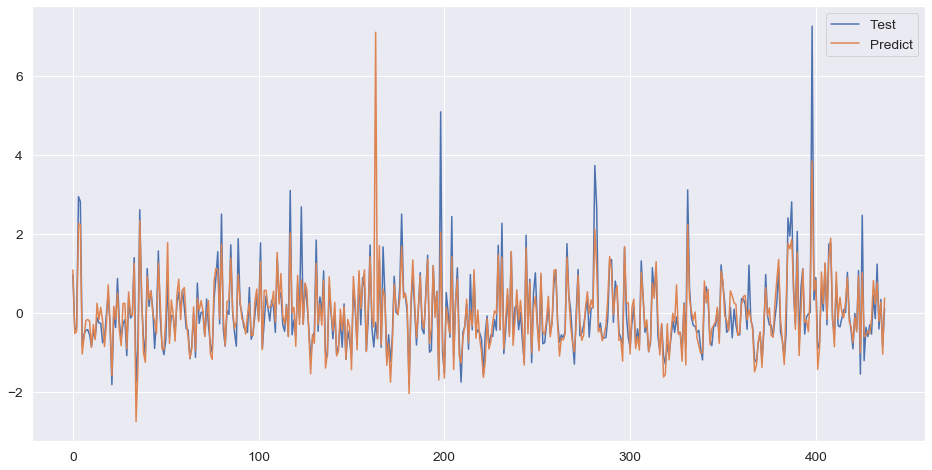

In [343]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Test')
plt.plot(predictions, label = 'Predict')
plt.legend()
plt.show

In [344]:
from sklearn import metrics
def error_metrics(predictions):
    print('Scaled: ')
    
    print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
    print('MSE: ',metrics.mean_squared_error(y_test,predictions))
    print('RMSE(Least Squares): ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

    print('Unscaled: ')
    orig_y_test=sc_y.inverse_transform(y_test)
    orig_predictions=sc_y.inverse_transform(predictions)
    
    MAE_converted=metrics.mean_absolute_error(orig_y_test,orig_predictions)
    RMS_converted=np.sqrt(metrics.mean_squared_error(orig_y_test,orig_predictions))

    print('MAE in terms of $ value: %.2f'%MAE_converted)
    print('RMS in terms of $ value: %.2f'%RMS_converted)

#results
error_metrics(predictions)

Scaled: 
MAE:  0.29105407971784336
MSE:  0.29995756024517595
RMSE(Least Squares):  0.5476838141164808
Unscaled: 
MAE in terms of $ value: 23088.56
RMS in terms of $ value: 43446.32


### Decision Tree Regression

In [345]:
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor(random_state=100)
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

By default DTR uses MSE error

In [346]:
dtr_pred = dtreg.predict(x_test)
dtr_pred = dtr_pred.reshape(-1,1)

In [347]:
#plt.figure(figsize=(16,8))
#plot y_test on x and predictions on y
#plt.scatter(y_test,dtr_pred,c='green')
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')
#plt.show

In [348]:
#results
error_metrics(dtr_pred)

Scaled: 
MAE:  0.3327904077116327
MSE:  0.2297983841710415
RMSE(Least Squares):  0.4793729072142496
Unscaled: 
MAE in terms of $ value: 26399.39
RMS in terms of $ value: 38027.40


### Support Vector Machine Regression

In [349]:
from sklearn.svm import SVR
svr=SVR(kernel = 'rbf')
svr.fit(x_train,y_train)

C:\Users\Andy\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [350]:
svr_pred = svr.predict(x_test)
svr_pred = svr_pred.reshape(-1,1)

In [351]:
#results
error_metrics(svr_pred)

Scaled: 
MAE:  0.23401679589999028
MSE:  0.1899647870349416
RMSE(Least Squares):  0.43584950044131243
Unscaled: 
MAE in terms of $ value: 18563.94
RMS in terms of $ value: 34574.80


### Neural Network Regression

In [352]:
#Decided to use PyTorch
#torch. is a class for creating tensors(arrays), operation on tensors
#object of class torch has .to() method to move between cpu and gpu by putting'cpu' and 'cuda' as argument
#torch.Tensor is central crass for auto grad (automatic differentiation)

#torch.nn is the neural network base. you can define a net by subclassing nn.Module
#in constructor you define struucture, in forward method you define operations with previously defined structural containers
#you just have to define forward function, bakward function gets generated for you automatically
#nn module also has loss functions in it, calling backward on loss will differentiate the whole graph wrt loss
#your network object will have methods to acess the weight values, by iterating through them you can do weight updates with your custom rule
#alternatively torch.optim package already has common update rules
#torch.utils.data.DataLoader is used for loading the data, is iterable
import torch
import torch.nn as nn
import torch.nn.functional as F

In [485]:
#Setting up the data
#Copying data before some manipulation
x_nn_train=x_train.copy()
x_nn_test=x_test.copy()
y_nn_train=y_train.copy()
y_nn_test=y_test.copy()
#Modifying train test split to match minibatch size better
print(f'Original X Size: {x_nn_train.shape}')
x_nn_train=np.append(x_nn_train,x_nn_test[0:2], axis=0)
print(f'Original Y Size: {y_nn_train.shape}')
y_nn_train=np.append(y_nn_train,y_nn_test[0:2], axis=0)
print(f'New size of X {x_nn_train.shape}, size of Y {y_nn_train.shape}')
#Split the date into mini batches of size 32 as per prior reaserch
x_nn_train=np.array_split(x_nn_train,32)
x_nn_train=np.stack(x_nn_train)
y_nn_train=np.array_split(y_nn_train,32)
y_nn_train=np.stack(y_nn_train)
print(f'Size after splitting into mini batches X: {x_nn_train.shape}, Y: {y_nn_train.shape}')
#Checking datatype
print(x_nn_train.dtype)
#In other words it is double(float64)
#Creating tensors from numpy array
x_nn_train=torch.from_numpy(x_nn_train)
x_nn_test=torch.from_numpy(x_nn_test)
y_nn_train=torch.from_numpy(y_nn_train)
y_nn_test=torch.from_numpy(y_nn_test)

#Setting to correct datatype
x_nn_train=x_nn_train.type(torch.FloatTensor)
x_nn_test=x_nn_test.type(torch.FloatTensor)
y_nn_train=y_nn_train.type(torch.FloatTensor)
y_nn_test=y_nn_test.type(torch.FloatTensor)

Original X Size: (1022, 14)
Original Y Size: (1022, 1)
New size of X (1024, 14), size of Y (1024, 1)
Size after splitting into mini batches X: (32, 32, 14), Y: (32, 32, 1)
float64


In [486]:
#Dimension variables, N batch size, D_in input dimension, H hidden layer dimension, D_out output dimension
N = x_nn_train.shape[1] 
D_in = x_nn_train.shape[2] 
H = D_in #for now, will test with different sizes
D_out = 1 #output variable will be output of regression of price
steps = 10000

In [487]:
#Defining the network
class HousePriceReg(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(HousePriceReg,self).__init__()#run parents constructor
        self.fc1 = nn.Linear(D_in, H)#fully connected layer and so on
        self.fc2 = nn.Linear(H, D_out)
        self.fc3 = nn.Linear(H, D_out)
        
    def forward(self,x):
        lay_1 = F.relu(self.fc1(x))#connecting the structure
        lay_2 = F.relu(lay_1)#connecting the structure
        y_pred = self.fc3(lay_2)
        return y_pred

In [488]:
#Instantiating the model
model=HousePriceReg(D_in, H, D_out)
#the optimizer for MSE loss 
criterion=torch.nn.MSELoss(reduction='mean')
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)

In [489]:
#Training
for step in range(steps):
    y_pred = model(x_nn_train)
    loss=criterion(y_pred,y_nn_train)
    if step % 50 == 49:
        print(f'Step:{step}, Loss:{loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Step:49, Loss:0.9151833653450012
Step:99, Loss:0.8095226883888245
Step:149, Loss:0.709621250629425
Step:199, Loss:0.616155207157135
Step:249, Loss:0.5310410261154175
Step:299, Loss:0.45608773827552795
Step:349, Loss:0.39367952942848206
Step:399, Loss:0.3440782427787781
Step:449, Loss:0.30602511763572693
Step:499, Loss:0.2778758704662323
Step:549, Loss:0.25753509998321533
Step:599, Loss:0.24280789494514465
Step:649, Loss:0.23205284774303436
Step:699, Loss:0.22402161359786987
Step:749, Loss:0.2178686559200287
Step:799, Loss:0.21299022436141968
Step:849, Loss:0.20899014174938202
Step:899, Loss:0.20560644567012787
Step:949, Loss:0.20265226066112518
Step:999, Loss:0.19999955594539642
Step:1049, Loss:0.19759178161621094
Step:1099, Loss:0.19538447260856628
Step:1149, Loss:0.19333913922309875
Step:1199, Loss:0.19142724573612213
Step:1249, Loss:0.1896274983882904
Step:1299, Loss:0.18792542815208435
Step:1349, Loss:0.18631666898727417
Step:1399, Loss:0.18479028344154358
Step:1449, Loss:0.1833356

In [490]:
#results
y_nn_pred=model(x_nn_test)
y_nn_pred=y_nn_pred.data.numpy()
print(f'Getting output of size: {y_nn_pred.shape} from input of size: {x_nn_test.size()}')
error_metrics(y_nn_pred)

Getting output of size: (438, 1) from input of size: torch.Size([438, 14])
Scaled: 
MAE:  0.26342650366180903
MSE:  0.3055072716505969
RMSE(Least Squares):  0.5527271222317545
Unscaled: 
MAE in terms of $ value: 20896.93
RMS in terms of $ value: 43846.39
